# Date a scientist

# Import packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from time import time
import itertools

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#classification metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Defining Functions

In [2]:
def mapping_func(column):
    i = 0
    column_mapping = {}
    cleanedList=column.value_counts().index.tolist()
    for values in cleanedList:
        column_mapping[values] = i
        i += 1
        #print(values, i)
    #print(column_mapping)
    return column_mapping

In [3]:
def NormaliseData(normalise_df):
    #feature_data = df[normalise_cols]
    x = normalise_df.values
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalise_df = pd.DataFrame(x_scaled, columns=normalise_df.columns)
    return normalise_df

In [4]:
#makes a scatter plot of data loops through a list
def scatterplotData(data,colsX,dataY):
    for x_plot in colsX:
        plt.scatter(data[x_plot], dataY, alpha=0.5)
        #print(data[x_plot].head(0).name)
        #plt.xlabel(data[x_plot].head(0))
        #plt.ylabel(dataY.head(0))
        plt.xlabel(data[x_plot].head(0).name)
        plt.ylabel(dataY.head(0).name)
        plt.show()  
    return 0

In [5]:
#function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [6]:
#function that executes the Multinominal Nubes Bay model and evaluates it
def MultinomalNB_func(trainData,trainLabels,testData,testLabels):
    # Start time 
    t_start_NB = time()
    #create classifier
    print(trainData.isnull().any())
    print(trainLabels.isnull().any())
    classifierNB=MultinomialNB()
    #fit data
    classifierNB.fit(trainData, trainLabels)
    #create test score
    test_scoreNB= classifierNB.score(testData,testLabels)
    #stop time and calculate 
    t_end_NB = time()
    time_NB=t_end_NB-t_start_NB
    #create predicted labels
    predicted_labels=classifierNB.predict(testData)
    
    print("*******Multinomal Nubes Bayes Classifier*******")
    #print(confusion_matrix(test_labels, predicted_labels))
    print("Score",test_scoreNB,"Time",time_NB )
    print("Accuracy Score", accuracy_score(testLabels, predicted_labels))
    print("Recall Score",recall_score(testLabels, predicted_labels, average='weighted'))
    print("F1 Score", f1_score(testLabels, predicted_labels, average='weighted'))
    #create labels for confusion matrix
          
    class_names=trainLabels.value_counts().index.tolist()
    cnf_matrix=confusion_matrix(testLabels, predicted_labels)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix, without normalization')
    #normalize=True,
    
    return()
    


In [7]:
#FUnction that loops through k to find the best score returns best k
#plotting k over score
def bestK_func(trainData,trainLabels,testData,testLabels,k_min,k_max):
    best_k=0
    best_score=0
    kx=[]
    ky=[]
    for k in range(k_min,k_max):
        classifier=KNeighborsClassifier(n_neighbors = k)
        classifier.fit(trainData, trainLabels)
        test_scoreKN= classifier.score(testData,testLabels)
        #print(k)
        #print(test_score)
        kx.append(k)
        ky.append(test_scoreKN)
        if test_scoreKN > best_score:
            best_score=test_scoreKN
            best_k=k
    #print(kplt[])
    plt.plot(kx,ky, )
    plt.xlabel("k")
    plt.ylabel("score")
    plt.show()
    
    return best_k
            
#print(best_k , best_score)

In [8]:
#if K_check is True the function will check for best k
#otherwise it will take the default k
def KNClassification_func(trainData,trainLabels,testData,testLabels,K_check,default_k,k_min,k_max):
    best_k=default_k
    #checks which k is best
    if(K_check == True):
        best_k=bestK_func(trainData,trainLabels,testData,testLabels,k_min,k_max)
        
    #starting time measure        
    t_start_KN = time()
    classifierKN=KNeighborsClassifier(n_neighbors = best_k)
    classifierKN.fit(trainData, trainLabels)
    test_scoreKN= classifierKN.score(testData,testLabels)
    t_end_KN = time()
    time_KN=t_end_KN-t_start_KN
    
    predicted_labels=classifierKN.predict(testData)
    
    print("*******K Nearest Classifier*******")
    #print(confusion_matrix(test_labels, predicted_labels))
    print("Score",test_scoreKN,"Time",time_KN, "with Best k",best_k )
    print("Accuracy Score", accuracy_score(testLabels, predicted_labels))
    print("Recall Score",recall_score(testLabels, predicted_labels, average='weighted'))
    print("F1 Score", f1_score(testLabels, predicted_labels, average='weighted'))
    #create labels for confusion matrix
    #pd.value_counts(pd.Series(predicted_labels)).plot(kind='bar')
    #plt.show()   
    
    class_names=trainLabels.value_counts().index.tolist()
    cnf_matrix=confusion_matrix(testLabels, predicted_labels)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix, without normalization')

In [9]:
#runs 2 Regression models
def Regression_Tester(x_data,y_data):
    train_data, test_data, train_labels, test_labels = train_test_split(x_data,y_data, test_size = 0.2, random_state = 1)
   
    t_start_regMR = time()
    regMR = LinearRegression()
    regMR.fit(train_data, train_labels)
    test_scoreMR = regMR.score(test_data,test_labels)
    t_end_regMR = time()
    
    train_scoreMR = regMR.score(train_data,train_labels)
    y_predict_MR=regMR.predict(test_data)
    dt_regMR=t_end_regMR-t_start_regMR
    
    t_start_regKN = time()
    regKN = KNeighborsRegressor(n_neighbors=2)
    regKN.fit(train_data, train_labels) 
    test_scoreKN = regKN.score(test_data, test_labels)
    t_end_regKN = time()
    y_predict_KN=regKN.predict(test_data)
    dt_regKN=t_end_regKN-t_start_regKN    
    
    mae_MR=mean_absolute_error(test_labels, y_predict_MR)
    mae_KN=mean_absolute_error(test_labels, y_predict_KN)
    
    r2_sc_MR=r2_score(test_labels, y_predict_MR, multioutput='variance_weighted')
    r2_sc_KN=r2_score(test_labels, y_predict_KN, multioutput='variance_weighted')
    #print(sorted(list(zip([xdata.head(0)],regMR.coef_)),key = lambda x: abs(x[1]),reverse=True))
    #print("x1,x2:",list(x_data.head(0)),"y:",list(y_data.head(0).name))
    print("x1,x2:",list(x_data.head(0)),"y:",list(y_data.head(0)))
    print("regMR:",test_scoreMR,"regKN:", test_scoreKN)
    print("R2 MR: ",r2_sc_MR,"R2 KN: ",r2_sc_KN)
    print("MAE MR: ",mae_MR,"MAE KN: ",mae_KN)
    print("time MR: ",dt_regMR,"time KN: ",dt_regKN)
    
    return 

#  Here starts the Main Programm

## 1) create Dataframe, Load Data

In [10]:
df = pd.read_csv("profiles.csv")

## 2) Look at the data and print some columns

In [11]:
print(list(df.head(0)))
#print(df.religion.value_counts())
#print(df.speaks.value_counts())
#print(df.last_online.value_counts())
#print(df.education.value_counts())
print("Amount of entries: ",df.shape[0])

['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']
Amount of entries:  59946


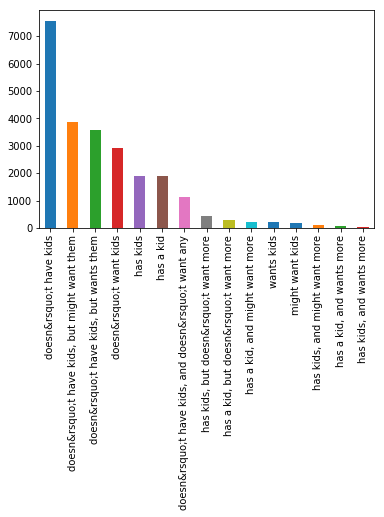

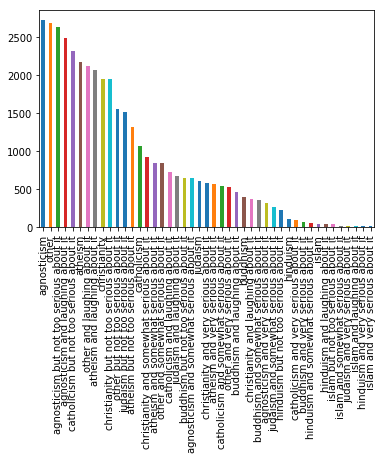

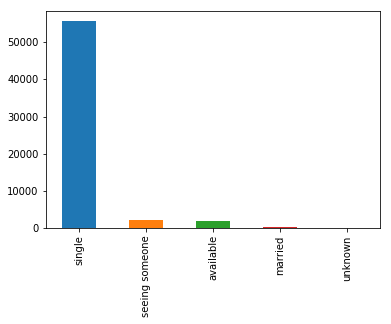

In [12]:
df['offspring'].value_counts().plot(kind='bar')
plt.show()
df['religion'].value_counts().plot(kind='bar')
plt.show()
df['status'].value_counts().plot(kind='bar')
plt.show()

## 3) Mapping the data

In [13]:
mapping_cols=['speaks','job','body_type','sex','smokes', 'drinks', 'drugs','orientation', 'status', 'offspring', 'religion', 'pets', 'education','ethnicity']

for cols in mapping_cols:
    df_column = df[cols]
    new_name = cols + "_code"
    #print(new_name)
    df[new_name] = df_column.map(mapping_func(df_column))
    df.fillna({new_name: 0}, inplace=True)


In [14]:
#Drop rows with nan in ydata
print(df.shape[0])
r1=df.shape[0]
colsofInterest=[ 'offspring']

df=df.dropna(subset=colsofInterest)
print(df.shape[0])
print(df.offspring.isnull().sum())
r2=df.shape[0]
print("Number of dropped rows containing NAN dropped:",r1-r2)

59946
24385
0
Number of dropped rows containing NAN dropped: 35561


In [15]:
status_mapping = {"unknown": 0,"single": 1, "available": 2, "seeing someone": 3,  "married": 4 }
df["status_code_lin"] = df.status.map(status_mapping)

#linear mapping from 'doesnt want kids' to 'has kids and wants more'
offspring_mapping={'doesn&rsquo;t want kids': 0, 'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 1, 'doesn&rsquo;t have kids': 2, 'doesn&rsquo;t have kids, but might want them': 3, 'doesn&rsquo;t have kids, but wants them': 4, 'might want kids': 5, 'wants kids': 6,  'has a kid': 7,   'has a kid, but doesn&rsquo;t want more': 8, 'has a kid, and might want more': 9, 'has a kid, and wants more': 10,  'has kids': 11,'has kids, but doesn&rsquo;t want more': 12,  'has kids, and might want more': 13, 'has kids, and wants more': 14}
df["offspring_code_lin"] = df.offspring.map(offspring_mapping)

#var 1 puts data into 2 categories: ( '0) has no kids' , '1) has kids')
offspring_mapping1={'doesn&rsquo;t want kids': 0, 'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 0, 'doesn&rsquo;t have kids': 0, 'doesn&rsquo;t have kids, but might want them': 0, 'doesn&rsquo;t have kids, but wants them': 0, 'might want kids': 0, 'wants kids': 0,  'has a kid': 1,   'has a kid, but doesn&rsquo;t want more': 1, 'has a kid, and might want more': 1, 'has a kid, and wants more': 1,  'has kids': 1,'has kids, but doesn&rsquo;t want more': 1,  'has kids, and might want more': 1, 'has kids, and wants more': 1}
df["offspring_code_var1"] = df.offspring.map(offspring_mapping1)

#var 2 puts data into 3 categories: 0) has no kids , 1) has one kid, 2)has multiple kids
offspring_mapping2={'doesn&rsquo;t want kids': 0, 'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 0, 'doesn&rsquo;t have kids': 0, 'doesn&rsquo;t have kids, but might want them': 0, 'doesn&rsquo;t have kids, but wants them': 0, 'might want kids': 0, 'wants kids': 0,  'has a kid': 1,   'has a kid, but doesn&rsquo;t want more': 1, 'has a kid, and might want more': 1, 'has a kid, and wants more': 1,  'has kids': 2,'has kids, but doesn&rsquo;t want more': 2,  'has kids, and might want more': 2, 'has kids, and wants more': 2}
df["offspring_code_var2"] = df.offspring.map(offspring_mapping2)

#var 3 puts data into 4 categories: 0) doesnt have kids 1) doesnt want kids , 2) wants kids, 3)has kids or a kid
offspring_mapping3={'doesn&rsquo;t want kids': 1, 'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 1, 'doesn&rsquo;t have kids': 0, 'doesn&rsquo;t have kids, but might want them': 2, 'doesn&rsquo;t have kids, but wants them': 2, 'might want kids': 2, 'wants kids': 2,  'has a kid': 3,   'has a kid, but doesn&rsquo;t want more': 3, 'has a kid, and might want more': 3, 'has a kid, and wants more': 3,  'has kids': 3,'has kids, but doesn&rsquo;t want more': 3,  'has kids, and might want more': 3, 'has kids, and wants more': 3}
df["offspring_code_var3"] = df.offspring.map(offspring_mapping3)

#var 3 puts data into 5 categories: 0) doesnt have kids 1) doesnt want kids , 2) wants kids, 3)has one kid 4)has multiple kids
offspring_mapping4={'doesn&rsquo;t want kids': 1, 'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 1, 'doesn&rsquo;t have kids': 0, 'doesn&rsquo;t have kids, but might want them': 2, 'doesn&rsquo;t have kids, but wants them': 2, 'might want kids': 2, 'wants kids': 2,  'has a kid': 3,   'has a kid, but doesn&rsquo;t want more': 3, 'has a kid, and might want more': 3, 'has a kid, and wants more': 3,  'has kids': 4,'has kids, but doesn&rsquo;t want more': 4,  'has kids, and might want more': 4, 'has kids, and wants more': 4}
df["offspring_code_var4"] = df.offspring.map(offspring_mapping4)

#religion mapping : from 'agnosticism and laughing about it': 0 to 'islam and very serious about it': 44
religion_mapping={'agnosticism and laughing about it': 0, 'other and laughing about it': 1, 'atheism and laughing about it': 2, 'catholicism and laughing about it': 3, 'judaism and laughing about it': 4, 'christianity and laughing about it': 5, 'buddhism and laughing about it': 6, 'hinduism and laughing about it': 7, 'islam and laughing about it': 8, 'agnosticism but not too serious about it': 9, 'catholicism but not too serious about it': 10, 'christianity but not too serious about it': 11, 'other but not too serious about it': 12, 'judaism but not too serious about it': 13, 'atheism but not too serious about it': 14, 'buddhism but not too serious about it': 15, 'hinduism but not too serious about it': 16, 'islam but not too serious about it': 17, 'agnosticism': 18, 'other': 19, 'atheism': 20, 'christianity': 21, 'catholicism': 22, 'judaism': 23, 'buddhism': 24, 'hinduism': 25, 'islam': 26, 'christianity and somewhat serious about it': 27, 'atheism and somewhat serious about it': 28, 'other and somewhat serious about it': 29, 'agnosticism and somewhat serious about it': 30, 'catholicism and somewhat serious about it': 31, 'buddhism and somewhat serious about it': 32, 'judaism and somewhat serious about it': 33, 'hinduism and somewhat serious about it': 34, 'islam and somewhat serious about it': 35, 'christianity and very serious about it': 36, 'atheism and very serious about it': 37, 'other and very serious about it': 38, 'agnosticism and very serious about it': 39, 'catholicism and very serious about it': 40, 'buddhism and very serious about it': 41, 'judaism and very serious about it': 42, 'hinduism and very serious about it': 43,'islam and very serious about it': 44}
df["religion_code_lin"] = df.religion.map(religion_mapping)


In [16]:
#fill nan with 0 in feature handmapped data
df.fillna({'age':0,'income':0,'religion_code_lin':0,'status_code_lin':0}, inplace=True)
# TODO it would be interesting to see how many nan are replaced with 0

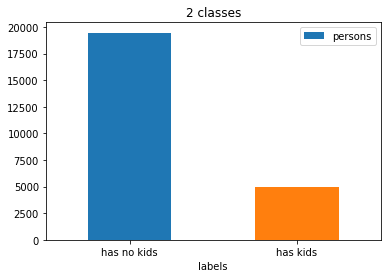

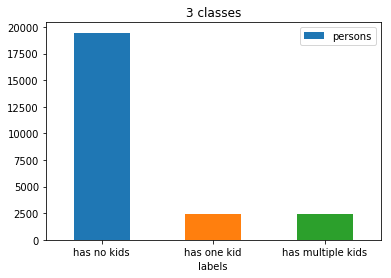

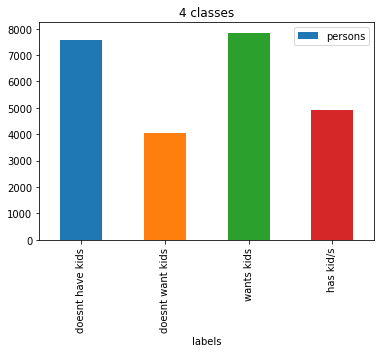

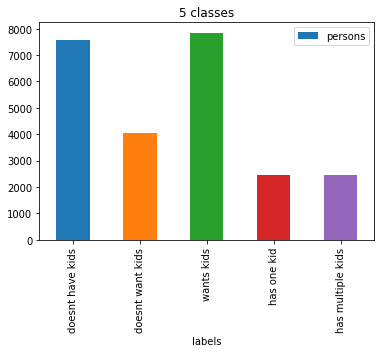

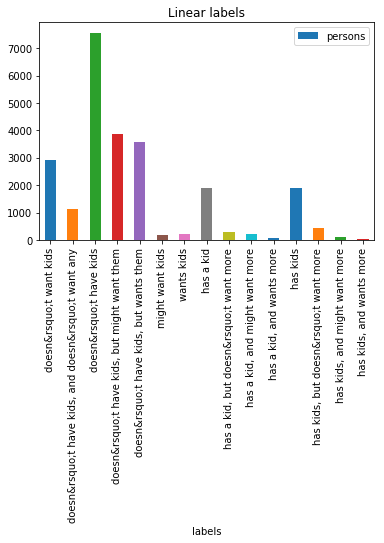

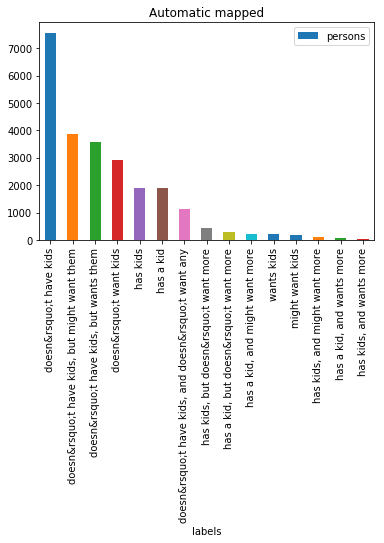

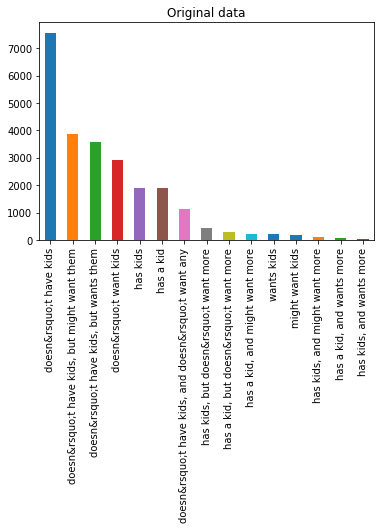

In [17]:
#plot offspring with 2 labels
dummi = pd.DataFrame({'labels':['has no kids', 'has kids'], 'persons': df['offspring_code_var1'].value_counts().sort_index()})
dummi.plot.bar(x='labels', y='persons', rot=0, title='2 classes')
plt.show()
#plot offspring with 3 labels
dummi = pd.DataFrame({'labels':['has no kids', 'has one kid' ,'has multiple kids'], 'persons': df['offspring_code_var2'].value_counts().sort_index()})
dummi.plot.bar(x='labels', y='persons', rot=0, title='3 classes')
plt.show()
#plot offspring with 4 labels
label3=['doesnt have kids', 'doesnt want kids' , 'wants kids', 'has kid/s' ]
dummi = pd.DataFrame({'labels':label3, 'persons': df['offspring_code_var3'].value_counts().sort_index()})
dummi.plot.bar(x='labels', y='persons', rot=90, title='4 classes')
plt.show()
#plot offspring with 4 labels
label4=['doesnt have kids', 'doesnt want kids' , 'wants kids', 'has one kid' ,'has multiple kids']
dummi = pd.DataFrame({'labels':label4, 'persons': df['offspring_code_var4'].value_counts().sort_index()})
dummi.plot.bar(x='labels', y='persons', rot=90, title='5 classes')
plt.show()
#plot offspring with linear labels
label5=['doesn&rsquo;t want kids', 'doesn&rsquo;t have kids, and doesn&rsquo;t want any', 'doesn&rsquo;t have kids', 'doesn&rsquo;t have kids, but might want them', 'doesn&rsquo;t have kids, but wants them', 'might want kids', 'wants kids',  'has a kid',   'has a kid, but doesn&rsquo;t want more', 'has a kid, and might want more', 'has a kid, and wants more',  'has kids','has kids, but doesn&rsquo;t want more',  'has kids, and might want more', 'has kids, and wants more']
dummi = pd.DataFrame({'labels':label5, 'persons': df['offspring_code_lin'].value_counts().sort_index()})
dummi.plot.bar(x='labels', y='persons', rot=90, title='Linear labels')
plt.show()
#plot offspring with automatic labels
label5=['doesn&rsquo;t have kids', 'doesn&rsquo;t have kids, but might want them', 'doesn&rsquo;t have kids, but wants them','doesn&rsquo;t want kids','has kids','has a kid','doesn&rsquo;t have kids, and doesn&rsquo;t want any','has kids, but doesn&rsquo;t want more','has a kid, but doesn&rsquo;t want more','has a kid, and might want more','wants kids','might want kids','has kids, and might want more','has a kid, and wants more','has kids, and wants more']
dummi = pd.DataFrame({'labels':label5, 'persons': df['offspring_code'].value_counts()})
dummi.plot.bar(x='labels', y='persons', rot=90, title='Automatic mapped')
plt.show()
#.sort_index()
#plot offspring 
plt.show()
df['offspring'].value_counts().plot(kind='bar', title='Original data')
plt.show()
#print(len(df['offspring_code_var1']))
#print(len(df['offspring_code_var2']))
#print(df.offspring.value_counts())


## 4)Those are the columns I am examinating

In [18]:
#check machine mapping vs handmapping
#normalise_cols_lin=[ 'religion_code_lin', 'status_code_lin']
#ydata_lin=df.offspring
#normalise_cols=[ 'religion_code', 'status_code']
#ydata=df.offspring

#normalise_cols=[ 'religion_code', 'status_code']
#ydata=df.offspring_code_var3

normalise_cols=[ 'religion_code','income','education_code', 'status_code','age','ethnicity_code','sex_code','orientation_code','pets_code']
ydata=df.offspring_code_var3
normalise_cols_lin=[ 'religion_code_lin','income','education_code', 'status_code_lin','age','ethnicity_code','sex_code','orientation_code','pets_code']
ydata_lin=df.offspring_code_var3


## 5) Normalise the Data 

In [19]:
#call Normalize Data
#for machine mapped Data
feature_data=NormaliseData(df[normalise_cols])
#for hand mapped Data
feature_data_lin=NormaliseData(df[normalise_cols_lin])

## 6) Create a test und train dataset

In [20]:
#train Data for Machine Mapping
train_data, test_data, train_labels, test_labels = train_test_split(feature_data, ydata, test_size = 0.2, random_state = 6)
#Train Data for Hand Mapping
train_data_lin, test_data_lin, train_labels_lin, test_labels_lin = train_test_split(feature_data_lin, ydata_lin, test_size = 0.2, random_state = 6)

## 7) Classification Nr 1: Multinominal NB 

religion_code       False
income              False
education_code      False
status_code         False
age                 False
ethnicity_code      False
sex_code            False
orientation_code    False
pets_code           False
dtype: bool
False
*******Multinomal Nubes Bayes Classifier*******
Score 0.34652450276809516 Time 0.03200197219848633
Accuracy Score 0.34652450276809516
Recall Score 0.34652450276809516
F1 Score 0.2697114507071994
Confusion matrix, without normalization
[[ 320   22 1168    2]
 [ 124   78  577   13]
 [ 258   34 1271    5]
 [ 313   31  640   21]]


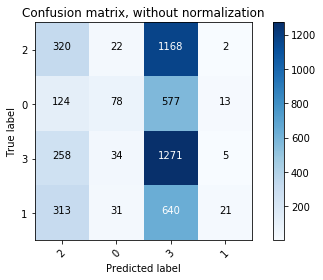

religion_code_lin    False
income               False
education_code       False
status_code_lin      False
age                  False
ethnicity_code       False
sex_code             False
orientation_code     False
pets_code            False
dtype: bool
False
*******Multinomal Nubes Bayes Classifier*******
Score 0.3356571662907525 Time 0.014000892639160156
Accuracy Score 0.3356571662907525
Recall Score 0.3356571662907525
F1 Score 0.24278106640175173
Confusion matrix, without normalization
[[ 235   23 1254    0]
 [  96   69  627    0]
 [ 199   36 1333    0]
 [ 247   21  737    0]]


C:\Users\EH\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


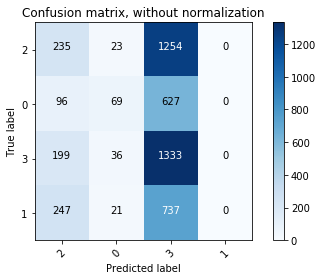

()

In [21]:
MultinomalNB_func(train_data,train_labels,test_data,test_labels)
MultinomalNB_func(train_data_lin,train_labels_lin,test_data_lin,test_labels_lin)

## 8)  Classification Nr. 2: KNearest

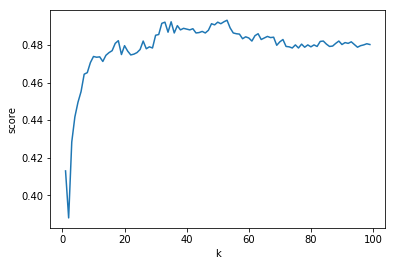

*******K Nearest Classifier*******
Score 0.49313102316998153 Time 0.8650496006011963 with Best k 53
Accuracy Score 0.49313102316998153
Recall Score 0.49313102316998153
F1 Score 0.4887173432942196
Confusion matrix, without normalization
[[747  83 568 114]
 [175 208 267 142]
 [523 105 854  86]
 [106  81 222 596]]


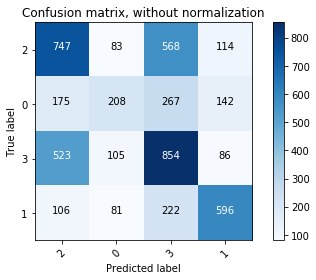

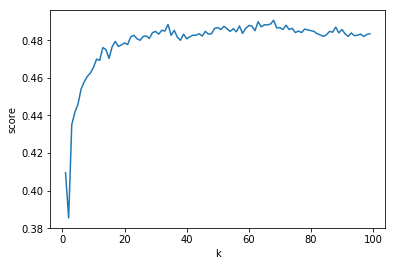

*******K Nearest Classifier*******
Score 0.4906704941562436 Time 0.8490486145019531 with Best k 68
Accuracy Score 0.4906704941562436
Recall Score 0.4906704941562436
F1 Score 0.48662332742176256
Confusion matrix, without normalization
[[721  72 598 121]
 [179 212 265 136]
 [507 117 879  65]
 [120  77 227 581]]


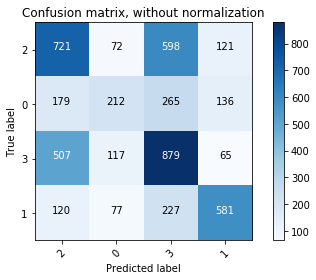

In [22]:
KNClassification_func(train_data,train_labels,test_data,test_labels,True,55,1,100)
KNClassification_func(train_data_lin,train_labels_lin,test_data_lin,test_labels_lin,True,55,1,100)

## 9) Classification Nr. 3 : Support Vector Classification 

In [23]:
gamma_min=1
gamma_max=2
c_min=5
c_max=10

best_score=0
for c_var in range(c_min,c_max):
    for gamma_var in range(gamma_min,gamma_max):
        
        classifierSVC = SVC(kernel="rbf",gamma=gamma_var,C=c_var)
        classifierSVC.fit(train_data, train_labels)

        test_scoreSVC= classifierSVC.score(test_data,test_labels)

        print(c_var,gamma_var,test_scoreSVC)

        if test_scoreSVC > best_score:
            best_score = test_scoreSVC
            best_gamma = gamma_var
            best_c = c_var




#print(best_c , best_gamma, best_score)

5 1 0.48759483288907113
6 1 0.4884150092269838
7 1 0.4890301414804183
8 1 0.4888250973959401
9 1 0.4871847447201148


In [24]:
print(best_c , best_gamma, best_score)

7 1 0.4890301414804183


Confusion matrix, without normalization
[[673  78 625 136]
 [141 209 279 163]
 [486 110 889  83]
 [ 92  78 221 614]]


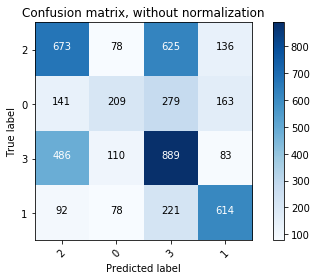

Accuracy Score 0.4890301414804183
Recall Score 0.4890301414804183
F1 Score 0.4833241952210675
SVC Score 0.4890301414804183 Time 24.728414297103882 with Best gamma 1 and best c 7


In [26]:
t_start_SVC = time()
classifierSVC = SVC(kernel="rbf",gamma=best_gamma,C=best_c)
classifierSVC.fit(train_data, train_labels)
test_scoreSVC = classifierSVC.score(test_data,test_labels)
t_end_SVC = time()
time_SVC=t_end_SVC-t_start_SVC

predicted_labels=classifierSVC.predict(test_data)
class_names=train_labels.value_counts().index.tolist()
cnf_matrix=confusion_matrix(test_labels, predicted_labels)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Confusion matrix, without normalization')

print("Accuracy Score", accuracy_score(test_labels, predicted_labels))
print("Recall Score",recall_score(test_labels, predicted_labels, average='weighted'))
print("F1 Score", f1_score(test_labels, predicted_labels, average='weighted'))
print("SVC Score",test_scoreSVC,"Time",time_SVC, "with Best gamma",best_gamma , "and best c", best_c )

## 10) Preparing Essay Columns for Regression

In [27]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df["essay_len"] = all_essays.apply(lambda x: len(x))
df["essay_I"] = all_essays.apply(lambda x: x.count(' i '))
df["essay_ME"] = all_essays.apply(lambda x: x.count(' me '))
df["essay_YOU"] = all_essays.apply(lambda x: x.count(' you '))
#df["word_count"]=all_essays.apply(lambda x: type(x))
#finding the amount of different words so is using
df["word_unique_count"]=all_essays.apply(lambda x: len(set(x.split())))

def wlengthfunc(arg):
    if(len(arg.split())!=0):
        outfunc=(len(arg)- arg.count(' '))/len(arg.split())
    else:
        outfunc=0
    return outfunc
                                      
df["avg_word_length"]=all_essays.apply(lambda x: wlengthfunc(x))
#print(df.speaks[12])
#print(df.speaks_number[12])


## 11) dropping the zeros out of essay cols, remove outliers

In [28]:
print(df.shape[0])
#colsofInterest=[ 'essay_len','word_unique_count', 'avg_word_length']
#df=df.dropna(subset=colsofInterest)
df = df.drop(df[df.word_unique_count == 0].index)
df = df.drop(df[df.essay_len > 80000].index)
df = df.drop(df[df.avg_word_length == 0].index)
df = df.drop(df[df.avg_word_length > 25].index)
df = df.drop(df[df.age < 21].index)
print(df.shape[0])
#print(df.essay_len.unique)
print(df[df.essay_len == 1].index)
print(df.loc[df['essay_len'] == 0])
print(df.shape[0])
#print(df.essay_len)

24385
22777
Int64Index([], dtype='int64')
Empty DataFrame
Columns: [age, body_type, diet, drinks, drugs, education, essay0, essay1, essay2, essay3, essay4, essay5, essay6, essay7, essay8, essay9, ethnicity, height, income, job, last_online, location, offspring, orientation, pets, religion, sex, sign, smokes, speaks, status, speaks_code, job_code, body_type_code, sex_code, smokes_code, drinks_code, drugs_code, orientation_code, status_code, offspring_code, religion_code, pets_code, education_code, ethnicity_code, status_code_lin, offspring_code_lin, offspring_code_var1, offspring_code_var2, offspring_code_var3, offspring_code_var4, religion_code_lin, essay_len, essay_I, essay_ME, essay_YOU, word_unique_count, avg_word_length]
Index: []

[0 rows x 58 columns]
22777


## 12) Preparing other columns

In [29]:
#print(df.speaks[10000])
df["speaks_number"]=df.speaks.apply(lambda x: len(str(x).split(",")))
#print(df.speaks_number[10000])

In [30]:
#print(df.age.value_counts())
#print(df[df.age != 109].age.value_counts())
df = df.drop(df[df.age > 100].index)
#print(df.age.value_counts())

## 13) These are the columns to examinate 

In [31]:
x_cols=[ 'avg_word_length','essay_len','education_code','speaks_number','income','offspring_code','word_unique_count']
x=df[x_cols]
y=df[['age']]
print(y.head(0))


Empty DataFrame
Columns: [age]
Index: []


## 14) Normalize Data and look plot Data 

In [32]:
#call Normalize Data
#for machine mapped Data
xdat=NormaliseData(df[x_cols])

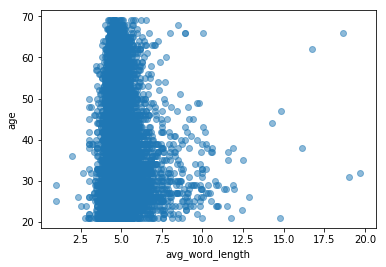

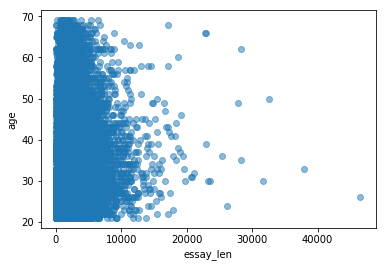

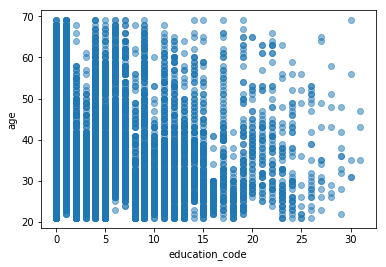

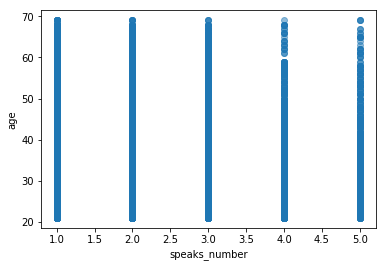

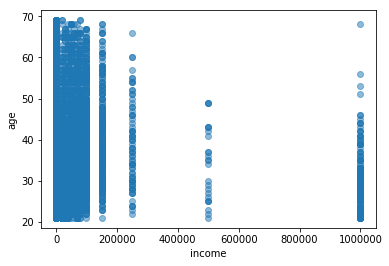

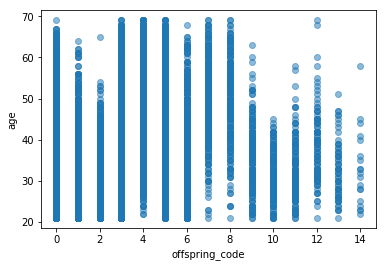

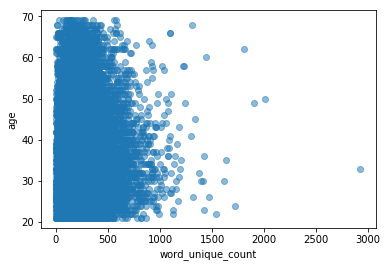

0

In [33]:
scatterplotData(df,x_cols,df.age)

In [34]:
#print(df.corr())

## 15) running the Regression function 

In [35]:
Regression_Tester(xdat,y)

x1,x2: ['avg_word_length', 'essay_len', 'education_code', 'speaks_number', 'income', 'offspring_code', 'word_unique_count'] y: ['age']
regMR: 0.11800948622368956 regKN: 0.11940971906285869
R2 MR:  0.11800948622368956 R2 KN:  0.11940971906285869
MAE MR:  7.686426965337256 MAE KN:  7.39332748024583
time MR:  0.012000799179077148 time KN:  0.2480144500732422


## 16) Loop Through the labels to find a good fit

In [36]:
#x_orig_cols=x_cols#[ 'essay_len','avg_word_length','education_code']
x_cols_ori=['avg_word_length','essay_len','education_code','speaks_number','income','offspring_code','word_unique_count','age']
for y in x_cols_ori:
    cols_buf_x=x_cols_ori.copy()
    cols_buf_x.remove(y)
    xdata=df[cols_buf_x]
    ydata=df[[y]]
    Regression_Tester(xdata,ydata)

x1,x2: ['essay_len', 'education_code', 'speaks_number', 'income', 'offspring_code', 'word_unique_count', 'age'] y: ['avg_word_length']
regMR: 0.28755848126279127 regKN: 0.1802815389193514
R2 MR:  0.28755848126279127 R2 KN:  0.1802815389193514
MAE MR:  0.3726163338543304 MAE KN:  0.4089924627013042
time MR:  0.019001007080078125 time KN:  0.3610208034515381
x1,x2: ['avg_word_length', 'education_code', 'speaks_number', 'income', 'offspring_code', 'word_unique_count', 'age'] y: ['essay_len']
regMR: 0.938595350453535 regKN: 0.8970784266441781
R2 MR:  0.938595350453535 R2 KN:  0.8970784266441781
MAE MR:  298.17915720047813 MAE KN:  249.2653643546971
time MR:  0.004000425338745117 time KN:  0.36202096939086914
x1,x2: ['avg_word_length', 'essay_len', 'speaks_number', 'income', 'offspring_code', 'word_unique_count', 'age'] y: ['education_code']
regMR: 0.005735950447644522 regKN: -0.49302450122779384
R2 MR:  0.005735950447644522 R2 KN:  -0.49302450122779384
MAE MR:  3.309763160804227 MAE KN:  3